# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="https://drive.google.com/uc?id=1j4eZRrDDC_ayowY7oj2ymsRMphdE4Tuf" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="https://drive.google.com/uc?id=1xQC3f1RCcZxyVUbZ71T-e4HyRIJFF94C" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


1.What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?
* Developing a machine learning model for classifying claims made in videos submitted to the platform.
* One of the following: accuracy, precision, recall, F1.

**Exemplar response:**

**Business need and modeling objective**

TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported&mdash;too many to be individually reviewed by a human moderator.

Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinions.

TikTok wants to build a machine learning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

**Modeling design and target variable**

The data dictionary shows that there is a column called `claim_status`. This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. In other words, for each video, the model should predict whether the video is a claim or an opinion.

This is a classification task because the model is predicting a binary class.

2.What are the ethical implications of the model? What are the consequences of your model making errors?
* What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?
    * The user who reported the video may become frustrated that TikTok did not remove the video, especially when the video does contain a claim.
* What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?
    * The user who posted the video that was reported may become frustrated that TikTok removed their video, especially when their video did not actually contain a claim.

**Exemplar response:**

**Select an evaluation metric**

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:

  - **False positives:** When the model predicts a video is a claim when in fact it is an opinion
  - **False negatives:** When the model predicts a video is an opinion when in fact it is a claim

In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed _and_ it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.

Because it's more important to minimize false negatives, the model evaluation metric will be **recall**.

3.How would you proceed?
* Perform EDA on the dataset first.

**Exemplar response:**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

<img src="https://drive.google.com/uc?id=11T_yNruYFOLpq2KIGHEDZ_FUzImLy2qa">

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score,\
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/GADAC/Course 6 ML/Course 6 TikTok/'

Mounted at /content/drive


In [3]:
# Load dataset into dataframe
data = pd.read_csv(path+"tiktok_dataset.csv")

<img src="https://drive.google.com/uc?id=1kpRJdR0z6z3foENI0hyMdZ9duLvXZ8Ca" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
data.isnull().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


**Exemplar response:** There are very few missing values relative to the number of samples in the dataset. Therefore, observations with missing values can be dropped.

In [10]:
# Drop rows with missing values
### YOUR CODE HERE ###
data.dropna(inplace=True)

In [11]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

**Exemplar response:** There are no duplicate observations in the data.

Check for and handle outliers.

**Exemplar response:** Tree-based models are robust to outliers, so there is no need to impute or drop any values based on where they fall in their distribution.

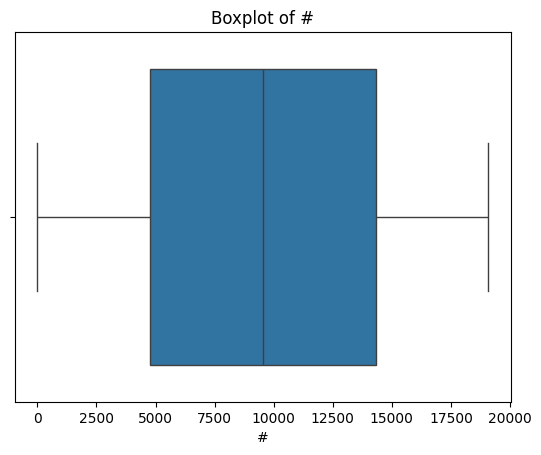

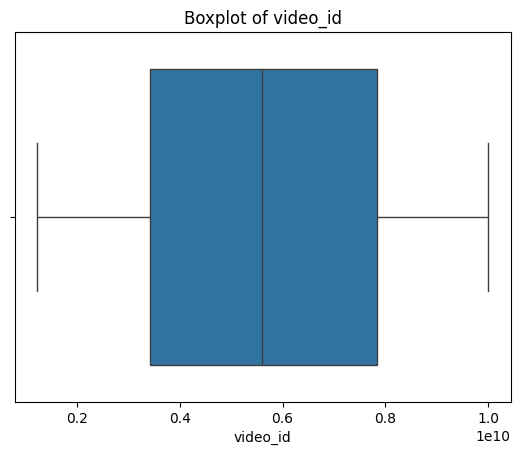

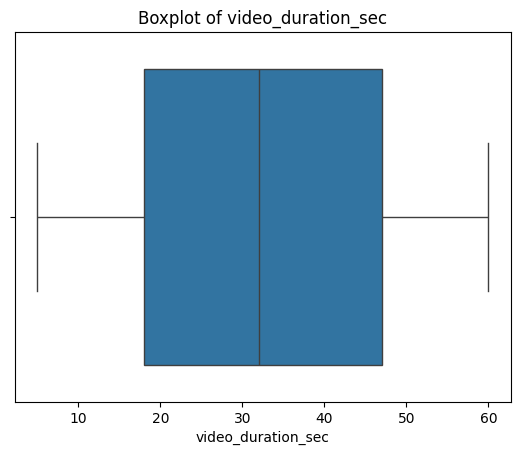

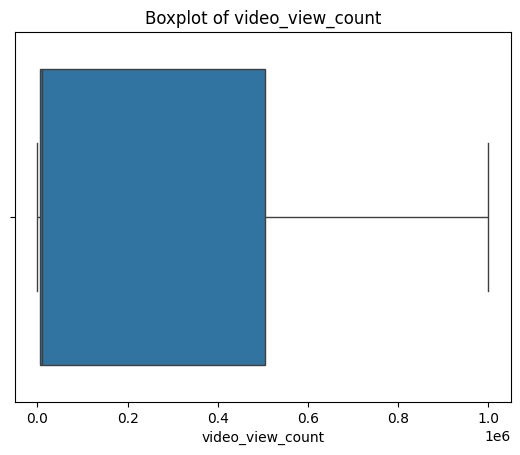

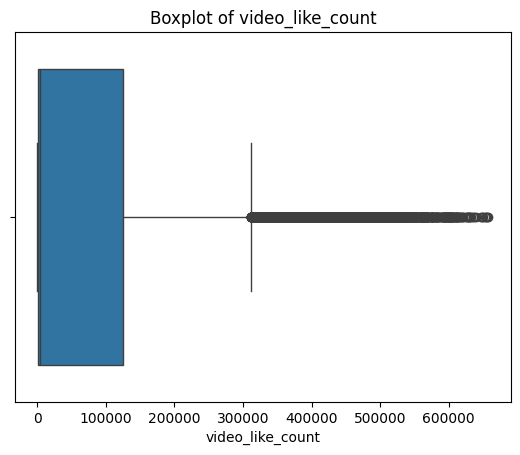

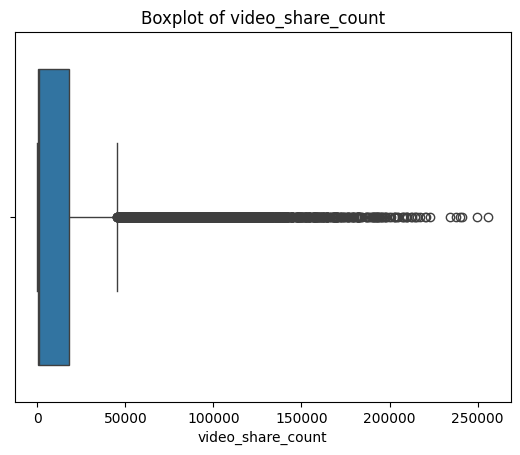

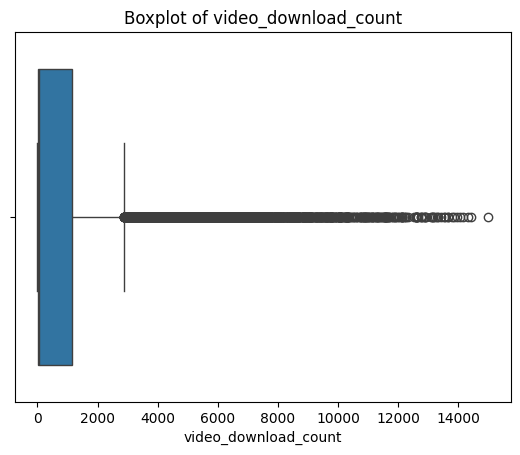

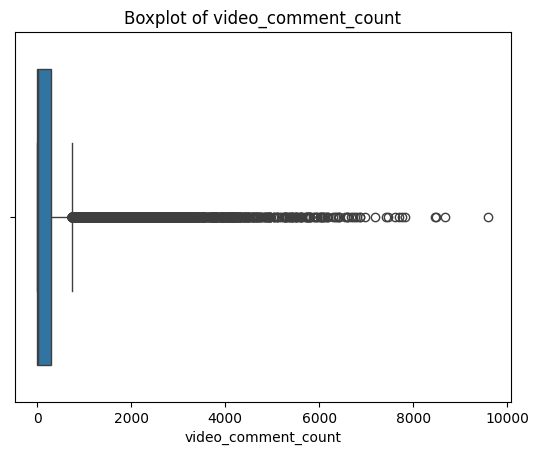

In [13]:
# prompt: Create boxplots for all numeric columns in data.

# Create boxplots for all numeric columns
for col in data.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.boxplot(x=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [14]:
# EXTRA
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [16]:
# prompt: In the dataframe data, take the log of `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`.

# Take the log of specified columns
#data[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']] = np.log1p(data[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']])


In [15]:
# EXTRA
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,19084,1.908400e+04,19084.000000,19084,19084,19084,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,17884,15383,NaN,NaN,NaN,NaN,NaN
mean,9542.500000,NaN,5.624840e+09,32.423811,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,NaN,2.537030e+09,16.226470,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,NaN,3.425100e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,NaN,5.609500e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,NaN,7.840823e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


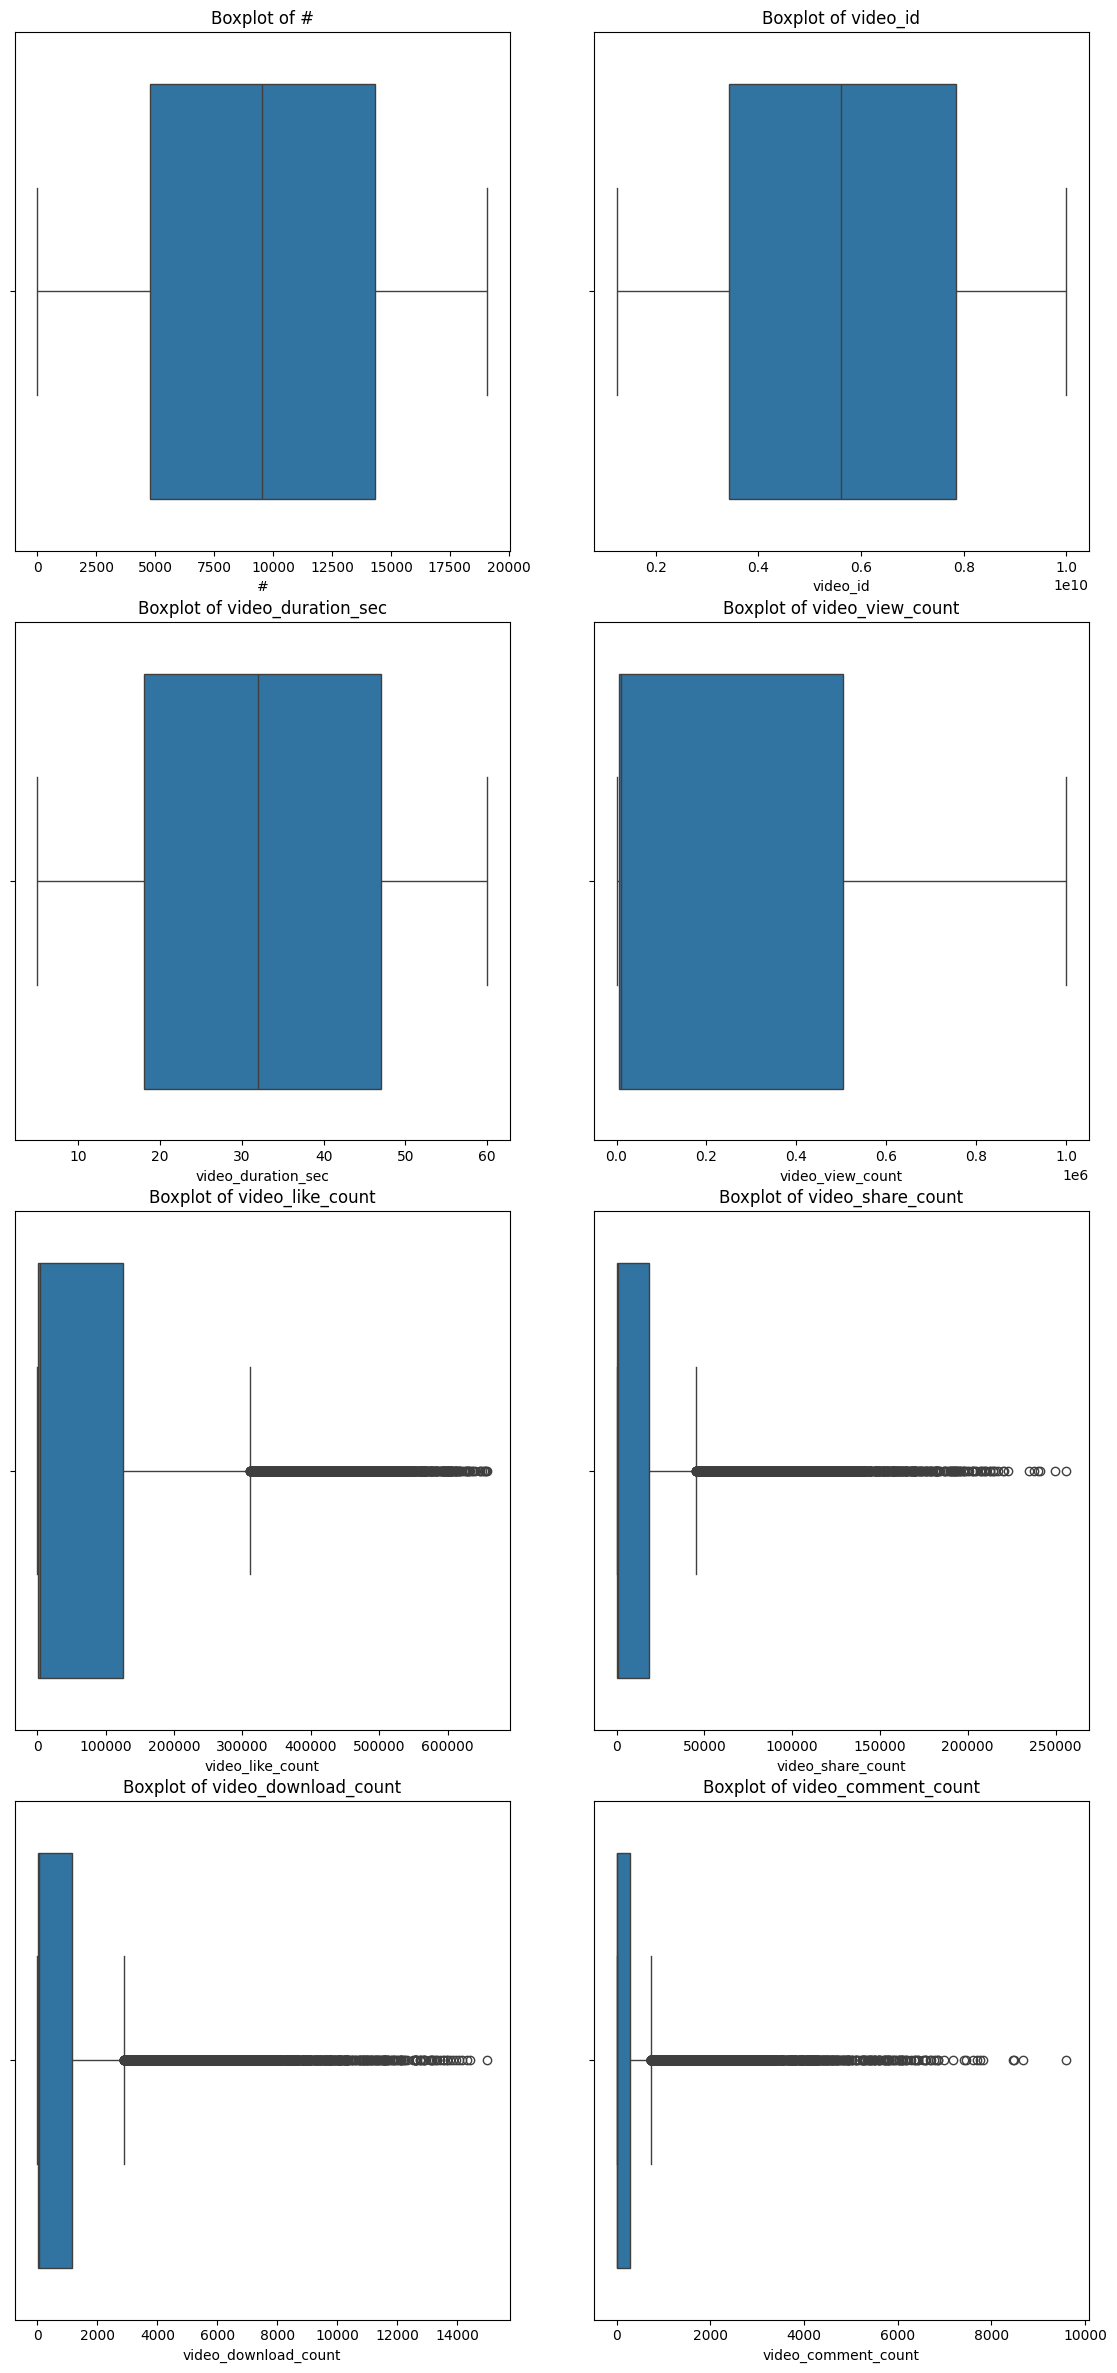

In [16]:
# prompt: Display boxplots for the numeric columns in data. Display these plots in a layout of two columns and multiple rows.

# Create boxplots for all numeric columns
num_cols = data.select_dtypes(include=np.number).columns
num_plots = len(num_cols)
rows = (num_plots + 1) // 2  # Calculate the number of rows needed
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(12, 6 * rows))
fig.tight_layout(pad=3.0)

for i, col in enumerate(num_cols):
  row = i // cols
  col_idx = i % cols
  sns.boxplot(x=data[col], ax=axs[row, col_idx])
  axs[row, col_idx].set_title(f'Boxplot of {col}')

# Remove any empty subplots
for i in range(num_plots, rows * cols):
  row = i // cols
  col_idx = i % cols
  fig.delaxes(axs[row, col_idx])

plt.show()


In [ ]:
### YOUR CODE HERE ###


Check class balance.

In [17]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

,proportion
claim_status,
claim,0.503458
opinion,0.496542


**Exemplar response:** Approximately 50.3% of the dataset represents claims and 49.7% represents opinions, so the outcome variable is balanced.

<img src="https://drive.google.com/uc?id=1xa68IrpTXu0KRFO49MEMiLaje8469nsk" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [18]:
# prompt: In the dataframe data, create a new column `text_length` that contains the length of `video_transcription_text`.

# Create a new column 'text_length'
data['text_length'] = data['video_transcription_text'].apply(len)


In [19]:
data['text_length'].describe()

,text_length
count,19084.000000
mean,89.093534
std,20.682086
min,31.000000
25%,75.000000
50%,87.000000
75%,101.000000
max,182.000000


In [20]:
# EXTRA
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###


Calculate the average text_length for claims and opinions.

In [21]:
# prompt: Show the average `text_length` for each value of `claim_status`.

data.groupby('claim_status')['text_length'].mean()


,text_length
claim_status,
claim,95.376978
opinion,82.722562


In [ ]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###


Visualize the distribution of `text_length` for claims and opinions.

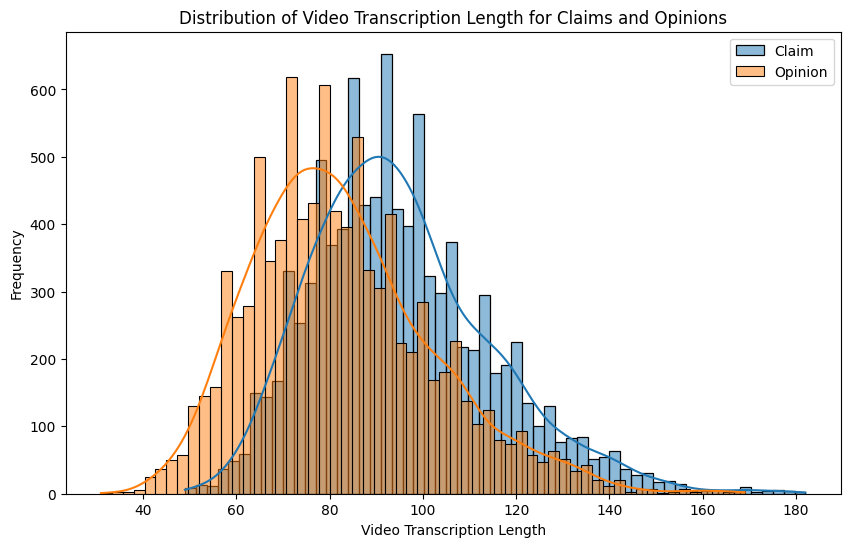

In [23]:
# prompt: Show the distribution of `video_trans_length` for each value of `claim_status` in the same plot.

#plt.figure(figsize=(10, 6))
#sns.histplot(data[data['claim_status'] == 'claim']['video_trans_length'], label='Claim', kde=True)
#sns.histplot(data[data['claim_status'] == 'opinion']['video_trans_length'], label='Opinion', kde=True)
#plt.xlabel('Video Transcription Length')
#plt.ylabel('Frequency')
#plt.title('Distribution of Video Transcription Length for Claims and Opinions')
#plt.legend()
#plt.show()


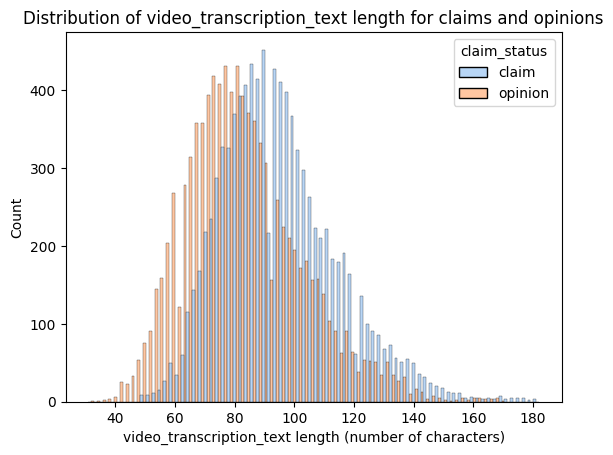

In [22]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters&mdash;about 13 more on average, as indicated in a previous cell.

**Feature selection and transformation**

Encode target and catgorical variables.

In [23]:
# EXTRA
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

In [25]:
# prompt: Drop the columns `#`, `video_id`, video_transcription_text` from data.

#data = data.drop(columns=['#', 'video_id', 'video_transcription_text'])


In [26]:
# prompt: In the dataframe data, change the name of the columns `video_trans_length` to `text_length`.

#data = data.rename(columns={'video_trans_length': 'text_length'})


In [ ]:
# EXTRA
#data.columns

In [ ]:
# EXTRA
#data['claim_status'].unique()

In [29]:
# prompt: Encode the values of `claim_status` as follows: 'claim' = 1 and 'opinion' = 0.

#data['claim_status'] = data['claim_status'].map({'claim': 1, 'opinion': 0})


In [30]:
# prompt: Dummy encode the columns `verified_status` and `author_ban_status`.

# Dummy encode the columns `verified_status` and `author_ban_status`.
#data = pd.get_dummies(data, columns=['verified_status', 'author_ban_status'], drop_first=True)


In [ ]:
# EXTRA
#data.columns

In [24]:
# Create a copy of the X data
### YOUR CODE HERE ###
X = data.copy()

# Drop unnecessary columns
### YOUR CODE HERE ###
X = X.drop(['#', 'video_id'], axis=1)

# Encode target variable
### YOUR CODE HERE ###
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
### YOUR CODE HERE ###
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [ ]:
# EXTRA
#data.head()

### **Task 4: Split the data**

Assign target variable.

**Exemplar response:**
In this case, the target variable is `claim_status`.
* 0 represents an opinion
* 1 represents a claim

In [25]:
# Isolate target variable
### YOUR CODE HERE ###
#y = data['claim_status']
y = X['claim_status']

Isolate the features.

In [26]:
# Isolate features
### YOUR CODE HERE ###
#X = data.drop(columns=['claim_status'], axis=1)
X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [27]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [28]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
#X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25,
#                                            stratify=y_train, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [29]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
#display(X_tr.shape, X_val.shape, X_test.shape)
#display(y_tr.shape, y_val.shape, y_test.shape)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

**Exemplar notes:**
- The number of features (`11`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`11,450`) and both validation and testing data (`3,817`).

### **BONUS CONTENT - Tokenize text column**

**NOTE:** You are not expected to do this or know this, but you might find it useful and/or interesting to understand some basic ideas behind natural language processing (NLP), because of the nature of the data provided in this TikTok project.

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

`CountVectorizer` works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, `CountVectorizer` lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [30]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

Fit the vectorizer to the training data (generate the n-grams) and transform it (tally the occurrences). Only fit to the training data, not the validation or test data.

In [31]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Get n-gram counts for the validation data. Notice that the vectorizer is not being refit to the validation data. It's only transforming it. In other words, the transcriptions of the videos in the validation data are only being checked against the n-grams found in the training data.

In [34]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


Repeat the process to get n-gram counts for the test data. Again, don't refit the vectorizer to the test data. Just transform it.

In [37]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [40]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
#rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
#cv_params = {'max_depth': [10, 50],
#             'min_samples_leaf': [0.5, 1],
#             'min_samples_split': [0.001, 0.01],
#             'max_features': ["sqrt"],
#             'n_estimators': [50, 100],
#             'max_samples': [.5, .9]
#             }

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
#scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
#rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)

# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [41]:
%%time
# EXTRA
#rf_cv.fit(X_tr, y_tr)
rf_cv.fit(X_train_final, y_train)

CPU times: user 8min 49s, sys: 747 ms, total: 8min 50s
Wall time: 8min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [42]:
# EXTRA
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [43]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9948228253467271

In [44]:
# EXTRA
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.997145,0.994823,0.999481,0.997118


In [ ]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###


In [45]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Question:** How well is your model performing? Consider average recall score and precision score.

* The metric scores from the cross validation are as follows:
    * F1 = 0.994331
    * Recall = 0.98959
    * Precision = 0.999128
    * Accuracy = 0.994323
* Best parameters:
    * max_depth: 50
    * max_features: sqrt
    * max_samples: 0.9
    * min_samples_leaf: 1
    * min_samples_split: 0.001
    * n_estimators: 50

**Exemplar response:**

This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

### **Build an XGBoost model**

In [46]:
#from xgboost import XGBClassifier
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
#xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
#cv_params = {'max_depth': [4],
#              'min_child_weight': [1],
#              'learning_rate': [0.35],
#              'n_estimators': [20, 25, 30, 35, 40],
#              'subsample': [0.8, 0.85, 0.9, 0.95, 1],
#              'colsample_bytree': [0.8, 0.85, 0.9, 0.95, 1]
#             }

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
#scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
#xgb_cv = GridSearchCV(estimator=xgb,
#                      param_grid=cv_params,
#                      scoring=scoring,
#                      refit='f1',
#                      cv=5,
#                      verbose=1)

# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [47]:
%%time
# EXTRA
#xgb_cv.fit(X_tr, y_tr)
xgb_cv.fit(X_train_final, y_train)

CPU times: user 2min 31s, sys: 1.42 s, total: 2min 32s
Wall time: 1min 31s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [48]:
# EXTRA
xgb_cv.best_score_

0.9898176171763818

In [49]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.994532,0.9893,0.999825,0.994498


In [50]:
# EXTRA
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

**Question:** How well does your model perform? Consider recall score and precision score.

* The metric scores from the cross validation are as follows:
    * F1 = 0.994242
    * Recall = 0.98907
    * Precision = 0.999474
    * Accuracy = 0.994236
* Best parameters:
    * colsample_bytree: 1
    * learning_rate: 0.35
    * max_depth: 4
    * min_child_weight: 1
    * n_estimators: 35
    * subsample: 1

**Exemplar response:**

This model also performs exceptionally well. Although its recall score is very slightly lower than the random forest model's, its precision score is perfect.

<img src="https://drive.google.com/uc?id=1O04Ts47cyQs_UPSPtJxUXGEKsSpteLRL" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [51]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###
#y_val_pred = rf_cv.best_estimator_.predict(X_val)
y_pred = rf_cv.best_estimator_.predict(X_val_final)

Display the predictions on the encoded testing set.

In [52]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [53]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_val

,claim_status
5846,1
12058,0
2975,1
8432,1
6863,1
...,...
6036,1
6544,1
2781,1
6426,1


Create a confusion matrix to visualize the results of the classification model.

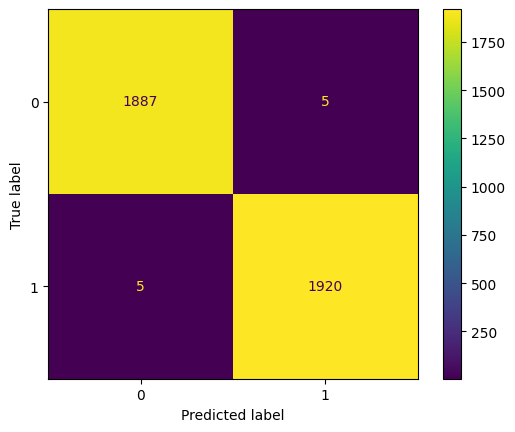

In [54]:
#from sklearn.metrics import ConfusionMatrixDisplay
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
#cm = confusion_matrix(y_val, y_val_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
#disp.plot(values_format='')

# Display plot
### YOUR CODE HERE ###
#plt.show()

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

**Exemplar notes:**

The upper-left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of opinions that the model misclassified as claims.

The lower-left quadrant displays the number of false negatives: the number of claims that the model misclassified as opinions.

The lower-right quadrant displays the number of true positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

~~As the above confusion matrix shows, this model does not produce any false negatives.~~

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [56]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
# 1. Print your accuracy score.
#print('Accuracy score final random forest model: ', accuracy_score(y_val, y_val_pred))

# 2. Print your precision score.
#print('Precision score final random forest model: ', precision_score(y_val, y_val_pred))

# 3. Print your recall score.
#print('Recall score final random forest model: ', recall_score(y_val, y_val_pred))

# 4. Print your f1 score.
#print('F1 score final random forest model: ', f1_score(y_val, y_val_pred))

target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, digits=3, target_names=target_labels))

              precision    recall  f1-score   support

     opinion      0.997     0.997     0.997      1892
       claim      0.997     0.997     0.997      1925

    accuracy                          0.997      3817
   macro avg      0.997     0.997     0.997      3817
weighted avg      0.997     0.997     0.997      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

* The metrics for the random forest validation are as follows:
    * Accuracy score final random forest model:  0.9963321980613047
    * Precision score final random forest model:  1.0
    * Recall score final random forest model:  0.9927159209157128
    * F1 score final random forest model:  0.9963446475195823
* The confusion matrix for the random forest validation are as follows:
    * cm[0,0] = 1895 (True Negative)
    * cm[0,1] = 0 (False Positive)
    * cm[1,0] = 14 (False Negative)
    * cm[1,1] = 1908 (True Positive)
* The random forest model is able to correctly classify most of the validation data, with a relatively small number of Type II errors.

**Exemplar response:**

The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 10 misclassifications&mdash;five false postives and five false negatives.

#### **XGBoost**

In [57]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
#y_val_pred_xgb = xgb_cv.best_estimator_.predict(X_val)
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

In [58]:
# EXTRA
y_pred

array([1, 0, 1, ..., 1, 1, 1])

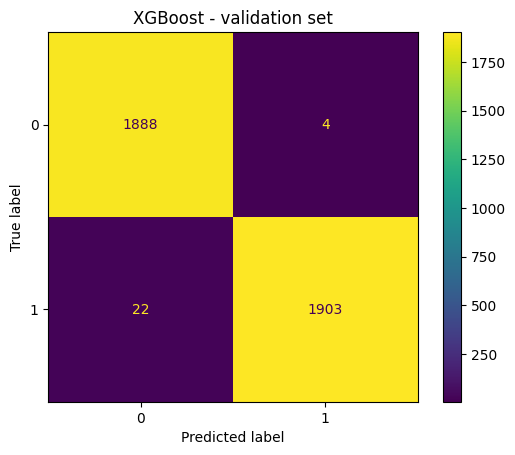

In [59]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
#cm = confusion_matrix(y_val, y_val_pred_xgb, labels=xgb_cv.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
#disp.plot(values_format='')

# Display plot
### YOUR CODE HERE ###
#plt.show()

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

In [60]:
# Create a classification report
### YOUR CODE HERE ###
# 1. Print your accuracy score.
#print('Accuracy score final XGBoost model: ', accuracy_score(y_val, y_val_pred_xgb))

# 2. Print your precision score.
#print('Precision score final XGBoost model: ', precision_score(y_val, y_val_pred_xgb))

# 3. Print your recall score.
#print('Recall score final XGBoost model: ', recall_score(y_val, y_val_pred_xgb))

# 4. Print your f1 score.
#print('F1 score final XGBoost model: ', f1_score(y_val, y_val_pred_xgb))

target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, digits=3, target_names=target_labels))

              precision    recall  f1-score   support

     opinion      0.988     0.998     0.993      1892
       claim      0.998     0.989     0.993      1925

    accuracy                          0.993      3817
   macro avg      0.993     0.993     0.993      3817
weighted avg      0.993     0.993     0.993      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

* The metrics of the XGBoost validation are as follows:
    * Accuracy score final XGBoost model:  0.9955462405030129
    * Precision score final XGBoost model:  0.9994756161510225
    * Recall score final XGBoost model:  0.991675338189386
    * F1 score final XGBoost model:  0.9955601984852441
* The confusion matrix for the XGBoost validation are as follows:
    * cm[0,0] = 1894 (True Negative)
    * cm[0,1] = 1 (False Positive)
    * cm[1,0] = 16 (False Negative)
    * cm[1,1] = 1906 (True Positive)
* The XGBoost model is able to correctly classify most of the validation with a relatively small number of errors like the random forest model, but the XGBoost model has both Type II and Type I errors.

**Exemplar response:**

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### **Use champion model to predict on test data**

In [54]:
# prompt: Train a random forest model with the following parameters: 'max_depth': 50, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 50, and random_state=42

# Instantiate the random forest classifier with the specified parameters
#rf_model = RandomForestClassifier(max_depth=50,
#                                  max_features='sqrt',
#                                  max_samples=0.9,
#                                  min_samples_leaf=1,
#                                  min_samples_split=0.001,
#                                  n_estimators=50,
#                                  random_state=42)

# Fit the model to the training data
#rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=42)

In [61]:
### YOUR CODE HERE ###
#y_test_pred = rf_model.predict(X_test)
y_pred = rf_cv.best_estimator_.predict(X_test_final)

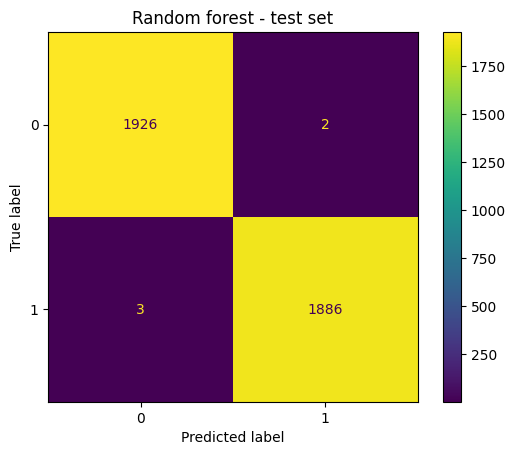

In [62]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
#cm = confusion_matrix(y_test, y_test_pred, labels=rf_model.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
#disp.plot(values_format='')

# Display plot
### YOUR CODE HERE ###
#plt.show()

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

In [ ]:
# EXTRA
# 1. Print your accuracy score.
#print('Accuracy score final random forest model: ', accuracy_score(y_test, y_test_pred))

# 2. Print your precision score.
#print('Precision score final random forest model: ', precision_score(y_test, y_test_pred))

# 3. Print your recall score.
#print('Recall score final random forest model: ', recall_score(y_test, y_test_pred))

# 4. Print your f1 score.
#print('F1 score final random forest model: ', f1_score(y_test, y_test_pred))

#### **Feature importances of champion model**


In [ ]:
# prompt: Show feature importances for a random forest model, rf_model.

# Get feature importances
#importances = rf_model.feature_importances_

# Create a list of tuples with feature names and their importances
#feature_importances = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances in descending order
#feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the feature importances
#for feature, importance in feature_importances:
#    print(f'{feature}: {importance:.4f}')


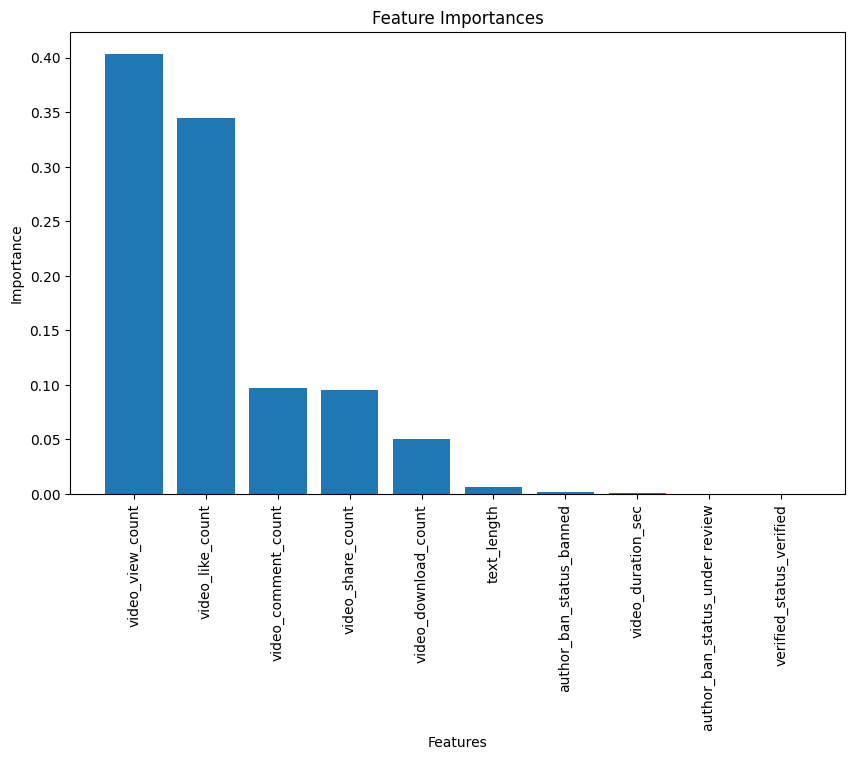

In [61]:
# prompt: Create a bar plot for feature_importances.

# Create a bar plot for feature_importances.
#plt.figure(figsize=(10, 6))
#plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Feature Importances')
#plt.xticks(rotation=90)
#plt.show()


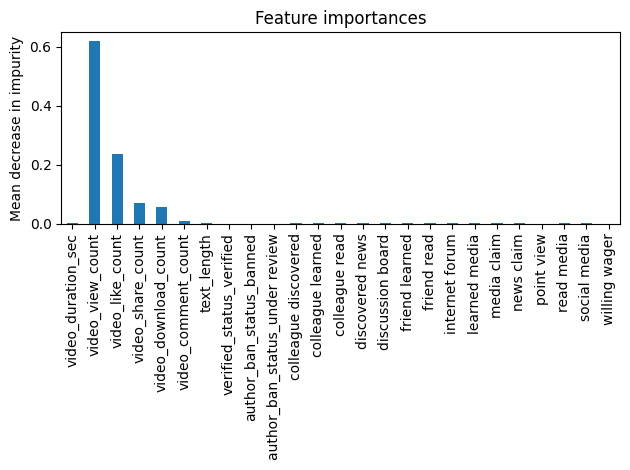

In [63]:
### YOUR CODE HERE ###
#plot_importance(rf_model);
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

* The top 2 important features are video_view_count and video_like_count.
    * video_view_count: 0.4034
    * video_like_count: 0.3446

**Exemplar response:**

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1.Would you recommend using this model? Why or why not?
* The metrics for the random forest model predictions with the test set are as follows:
    * Accuracy score final random forest model:  0.9958082263557768
    * Precision score final random forest model:  0.999475890985325
    * Recall score final random forest model:  0.9921956295525495
    * F1 score final random forest model:  0.9958224543080941

2.What was your model doing? Can you explain how it was making predictions?
* The random forest model's hyperparameters are as follows:
    * max_depth = 50,
    * max_features = sqrt
    * max_samples = 0.9
    * min_samples_leaf = 1
    * min_samples_split = 0.001
    * n_estimators = 50
* The variables video_view_count and video_like_count are the two most important features.

3.Are there new features that you can engineer that might improve model performance?
* The features that were chosen are sufficient for the models.

4.What features would you want to have that would likely improve the performance of your model?
* The features that were chosen are sufficient for the models.

**Exemplar response:**

1. *Would you recommend using this model? Why or why not?*
Yes, one can recommend this model because it performed well on both the validation and test holdout data. Furthermore, both precision and F<sub>1</sub> scores were consistently high. The model very successfully classified claims and opinions.
</br>
2. *What was your model doing? Can you explain how it was making predictions?*
The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.
</br>
3. *Are there new features that you can engineer that might improve model performance?*
Because the model currently performs nearly perfectly, there is no need to engineer any new features.
</br>
4. *What features would you want to have that would likely improve the performance of your model?*
The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.